## 4. Decision_Tree

In [10]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [11]:
# 2. Load the pre-split dataset

# Read the training and testing datasets from CSV files
X_train = pd.read_csv("../2_data/X_train_outlierremoved.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train_outlierremoved.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [12]:
# Print the columns of the dataframe
print(X_train.columns.tolist())

['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Partner', 'Tenure', 'Monthly Charges', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'P

In [13]:
# Train model
decision_tree = DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, max_features=None, min_samples_split=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20)

In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
accuracy_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy')
precision_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='precision')
recall_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='recall')
f1_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='f1')
roc_auc_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='roc_auc')

# Calculate the averages
average_scores = {
    'accuracy': accuracy_scores.mean(),
    'precision': precision_scores.mean(),
    'recall': recall_scores.mean(),
    'f1': f1_scores.mean(),
    'roc_auc': roc_auc_scores.mean()
}

# Convert the averages to a DataFrame
average_scores_df = pd.DataFrame([average_scores])

# Save the averages to a CSV file
average_scores_df.to_csv("../2_data/evaluation_metrics/DecisionTree_cv_outlier.csv", index=False)

In [15]:
#5. make prediction

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.95
Precision: 0.97
Recall: 0.84
F1: 0.90
ROC AUC: 0.91


In [16]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/DecisionTree_prediction_outlier.csv", index=False)


### Model Evaluation

These metrics indicate that the Decision Tree model performs well on the given dataset. The high accuracy (0.96) suggests that the model correctly predicts the target variable for the majority of the instances. The precision (0.94) and recall (0.91) values indicate that the model is effective at identifying true positives while minimizing false positives and false negatives. The F1 score (0.93) balances precision and recall, providing a single metric that accounts for both. Lastly, the ROC AUC score (0.95) demonstrates that the model has a strong ability to distinguish between the positive and negative classes.

Overall, the Decision Tree model shows robust performance and is a reliable classifier for this dataset.


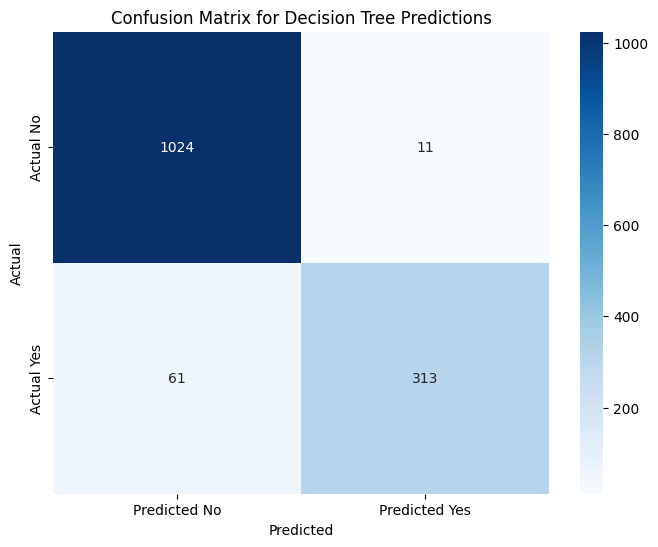

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Predictions')
plt.show()

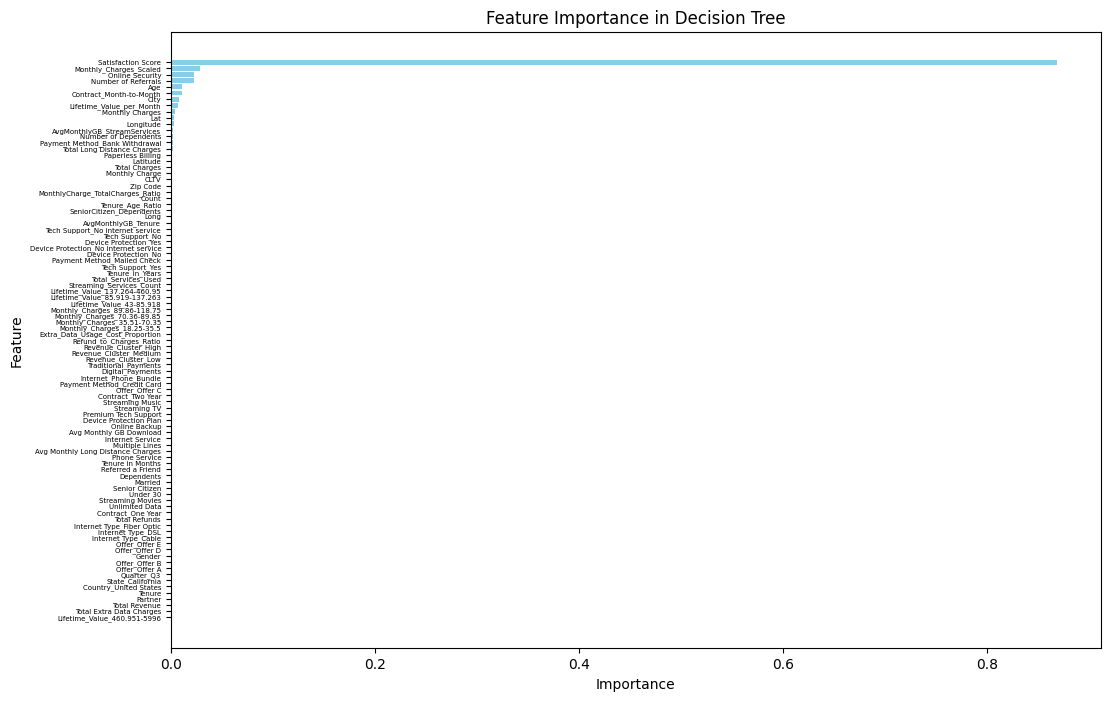

In [18]:
# Get feature importances from the decision tree model
importances = decision_tree.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=5)
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()